## Mountain Car

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_data_distribution(df, per, dim):
    # Define datasets
    data_len = len(df.index)
    data_used = round(data_len * per)
    datasets = {
        'Full Dataset': df,
        'First 10,000 Samples': df.head(data_used),
        'Sampled Data (10%)': df.sample(frac=per)
    }

    # Get the dimensionality of 'state'
    state_dimension = dim #len(df['state'].iloc[0])

    # Create a color map for each feature
    feature_colors = {i: plt.cm.get_cmap('tab10')(i) for i in range(state_dimension)}

    # Number of subplots for each feature
    num_subplots = len(datasets)

    plt.figure(figsize=(18, 8 * num_subplots))

    for j, (dataset_name, dataset) in enumerate(datasets.items()):
        for i in range(state_dimension):
            plt.subplot(num_subplots, state_dimension, i + 1 + j * state_dimension)

            feature_values = dataset['state'].apply(lambda x: x[i])  # Extract feature values

            # Use different colors for each unique feature
            plt.hist(feature_values, bins=50, alpha=0.7, color=feature_colors[i])
            plt.title(f'{dataset_name} - Distribution - Dimension {i+1}')
            plt.xlabel(f'Dimension {i+1}')
            plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

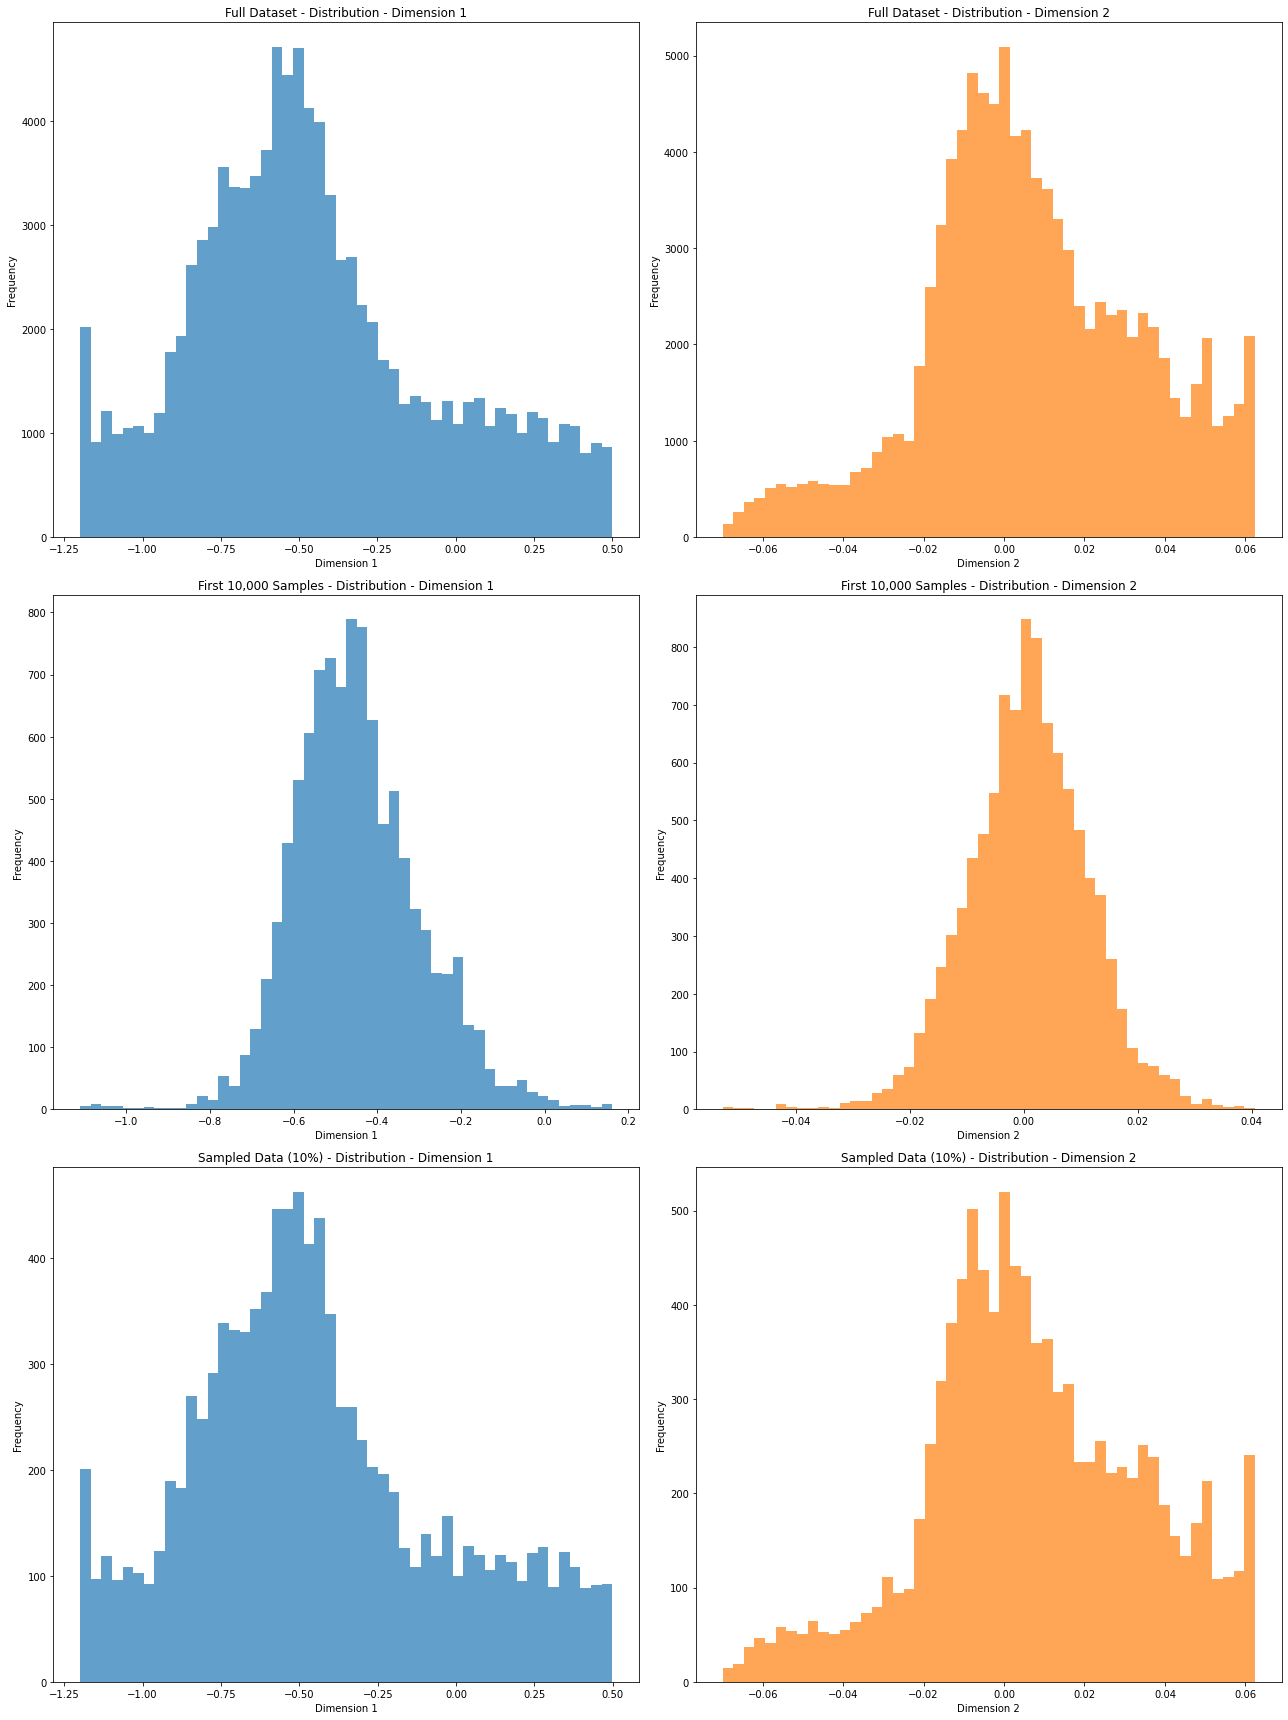

In [24]:
# Load the DataFrame
df = pd.read_pickle('OfflineRL-OOD-Teacher-Student/Discrete/CQL-DQN/data/Mountain_car_expertRun3.pkl')
plot_data_distribution(df,0.1)

## Expert Buffer

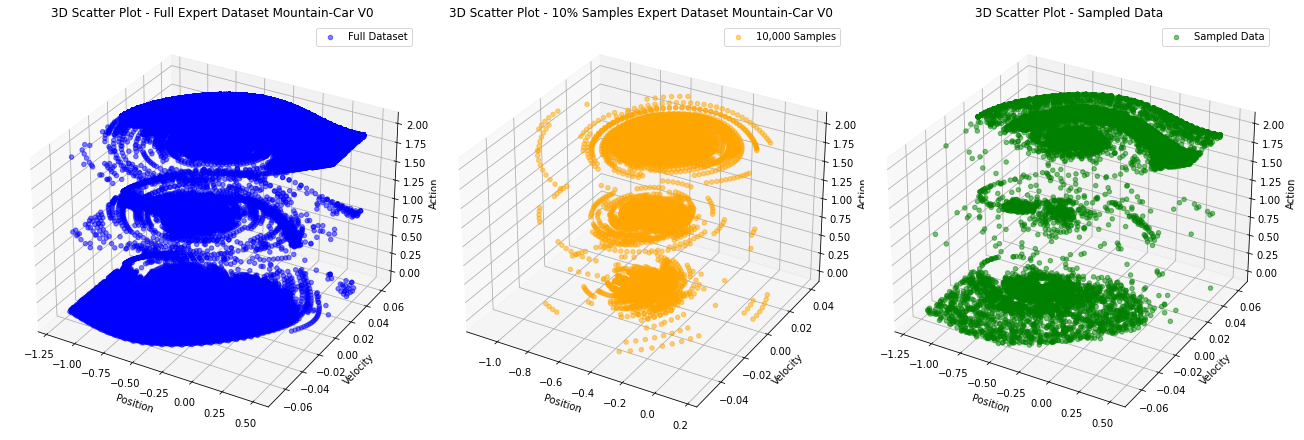

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plots for position and velocity for full dataset, first 10,000, and sampled data
fig = plt.figure(figsize=(18, 6))

# Plot for full dataset
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(position_full, velocity_full, action_full, c='blue', label='Full Dataset', alpha=0.5)
ax1.set_xlabel('Position')
ax1.set_ylabel('Velocity')
ax1.set_zlabel('Action')
ax1.set_title('3D Scatter Plot - Full Expert Dataset Mountain-Car V0')
ax1.legend()

# Plot for first 10,000 samples
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(position_first10, velocity_first10, action_first10, c='orange', label='10,000 Samples', alpha=0.5)
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')
ax2.set_zlabel('Action')
ax2.set_title('3D Scatter Plot - 10% Samples Expert Dataset Mountain-Car V0')
ax2.legend()

# Plot for sampled data
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(position_sampled, velocity_sampled, action_sampled, c='green', label='Sampled Data', alpha=0.5)
ax3.set_xlabel('Position')
ax3.set_ylabel('Velocity')
ax3.set_zlabel('Action')
ax3.set_title('3D Scatter Plot - Sampled Data')
ax3.legend()

plt.tight_layout()
plt.show()

## Replay Buffer

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_pickle('data/MountainCar-v0_run3_fullyconv.pkl')
df_full = df
filtered_df = df[df['state'].apply(lambda x: x[0] > -0.8 or x[0] > -0.2)]
df_first10 = filtered_df.head(10000)
df_sampled = df.sample(frac = 0.1)
#df_new = df.iloc[:, [0,1]]
#print(df_new.head)
position_full = []
velocity_full = []
action_full = []
position_first10 = []
velocity_first10 = []
action_first10 = []
position_sampled = []
velocity_sampled = []
action_sampled = []
for ind in df.index:
    position_full.append(df['state'][ind][0])
    velocity_full.append(df['state'][ind][1])
    action_full.append(df['action'][ind][0])
print(len(action_full))
for ind in df_first10.index:
    position_first10.append(df_first10['state'][ind][0])
    velocity_first10.append(df_first10['state'][ind][1])
    action_first10.append(df_first10['action'][ind][0])
print(len(action_first10))
for ind in df_sampled.index:
    position_sampled.append(df_sampled['state'][ind][0])
    velocity_sampled.append(df_sampled['state'][ind][1])
    action_sampled.append(df_sampled['action'][ind][0])
print(len(action_sampled))

100000
10000
10000


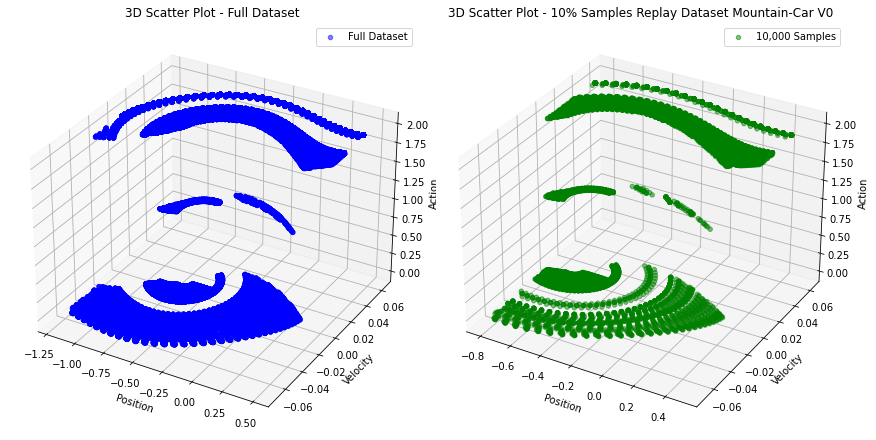

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plots for position and velocity for full dataset, first 10,000, and sampled data
fig = plt.figure(figsize=(18, 6))

# Plot for full dataset
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(position_full, velocity_full, action_full, c='blue', label='Full Dataset', alpha=0.5)
ax1.set_xlabel('Position')
ax1.set_ylabel('Velocity')
ax1.set_zlabel('Action')
ax1.set_title('3D Scatter Plot - Full Dataset')
ax1.legend()

# Plot for first 10,000 samples
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(position_first10, velocity_first10, action_first10, c='green', label='10,000 Samples', alpha=0.5)
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')
ax2.set_zlabel('Action')
ax2.set_title('3D Scatter Plot - 10% Samples Replay Dataset Mountain-Car V0')
ax2.legend()

# Plot for sampled data
'''ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(position_sampled, velocity_sampled, action_sampled, c='green', label='Sampled Data', alpha=0.5)
ax3.set_xlabel('Position')
ax3.set_ylabel('Velocity')
ax3.set_zlabel('Action')
ax3.set_title('3D Scatter Plot - Sampled Data')
ax3.legend()'''

plt.tight_layout()
plt.show()

## Noisy Buffer

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_pickle('OfflineRL-OOD-Teacher-Student/Discrete/CQL-DQN/data/MountainCar-v0_run3_noisyconv.pkl')
filtered_df = df[df['state'].apply(lambda x: x[0] > -0.8 or x[0] > -0.2)]
df_full = df
df_first10 = filtered_df.head(10000)
df_sampled = df.sample(frac = 0.1)

#df_new = df.iloc[:, [0,1]]
#print(df_new.head)
position_full = []
velocity_full = []
action_full = []
position_first10 = []
velocity_first10 = []
action_first10 = []
position_sampled = []
velocity_sampled = []
action_sampled = []
for ind in df.index:
    position_full.append(df['state'][ind][0])
    velocity_full.append(df['state'][ind][1])
    action_full.append(df['action'][ind][0])
print(len(action_full))
for ind in df_first10.index:
        position_first10.append(df_first10['state'][ind][0])
        velocity_first10.append(df_first10['state'][ind][1])
        action_first10.append(df_first10['action'][ind][0])
print(len(action_first10))
for ind in df_sampled.index:
    position_sampled.append(df_sampled['state'][ind][0])
    velocity_sampled.append(df_sampled['state'][ind][1])
    action_sampled.append(df_sampled['action'][ind][0])
print(len(action_sampled))

100000
10000
10000


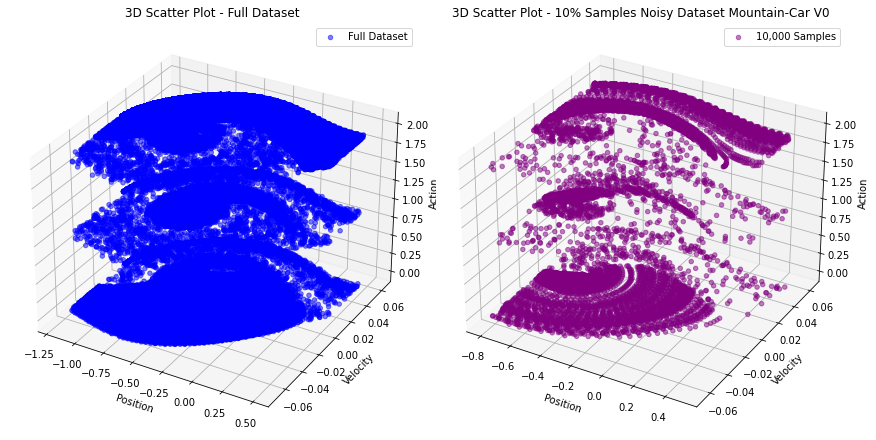

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plots for position and velocity for full dataset, first 10,000, and sampled data
fig = plt.figure(figsize=(18, 6))

# Plot for full dataset
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(position_full, velocity_full, action_full, c='blue', label='Full Dataset', alpha=0.5)
ax1.set_xlabel('Position')
ax1.set_ylabel('Velocity')
ax1.set_zlabel('Action')
ax1.set_title('3D Scatter Plot - Full Dataset')
ax1.legend()

# Plot for first 10,000 samples
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(position_first10, velocity_first10, action_first10, c='purple', label='10,000 Samples', alpha=0.5)
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')
ax2.set_zlabel('Action')
ax2.set_title('3D Scatter Plot - 10% Samples Noisy Dataset Mountain-Car V0')
ax2.legend()

# Plot for sampled data
'''ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(position_sampled, velocity_sampled, action_sampled, c='green', label='Sampled Data', alpha=0.5)
ax3.set_xlabel('Position')
ax3.set_ylabel('Velocity')
ax3.set_zlabel('Action')
ax3.set_title('3D Scatter Plot - Sampled Data')
ax3.legend()'''

plt.tight_layout()
plt.show()

## CARTPOLE

## Expert Buffer

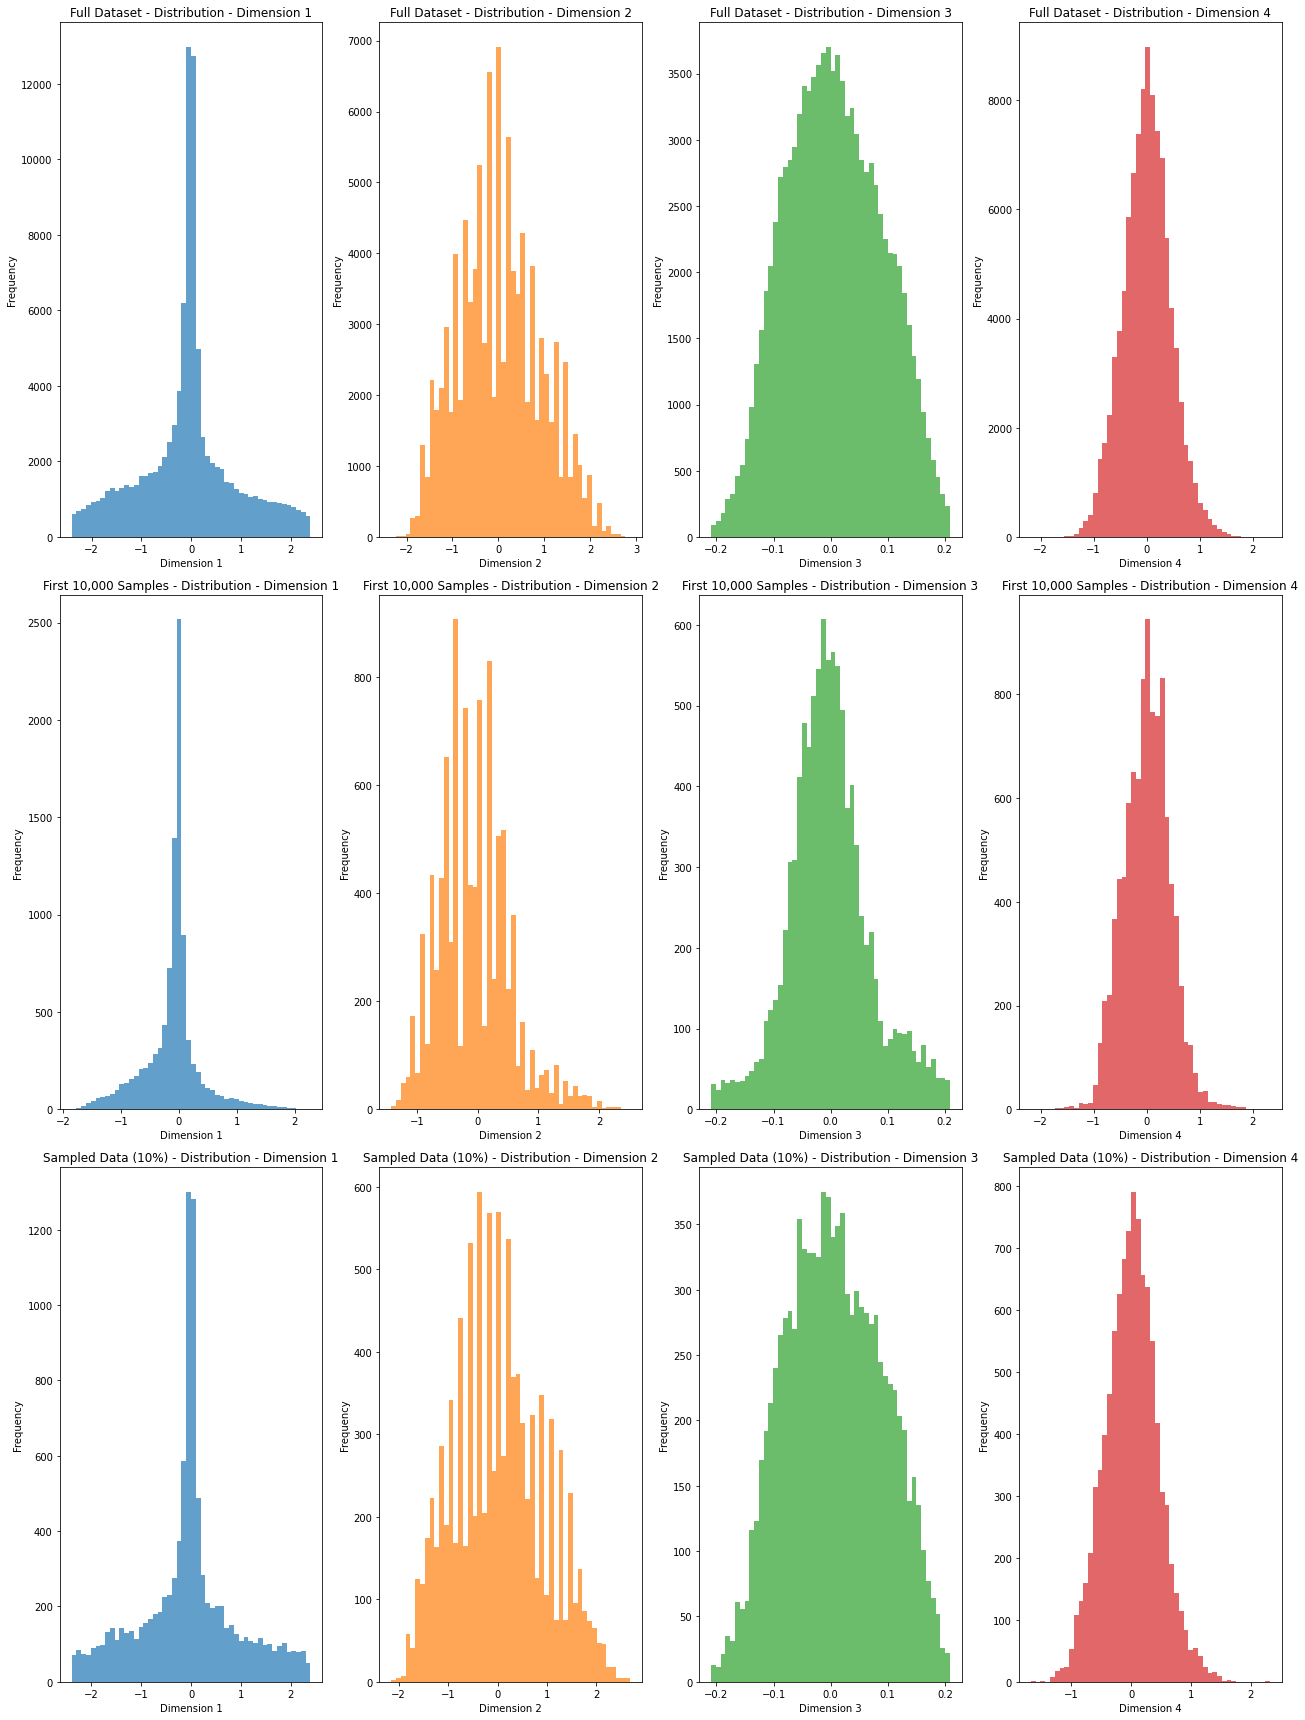

In [4]:
df = pd.read_pickle('data/CartPole-v1_run3_erconv.pkl')
filtered_df = df[df['state'].apply(lambda x: x[3] > -0.1)]
plot_data_distribution(df,0.1,4)

## Lander Environment

## Expert Buffer

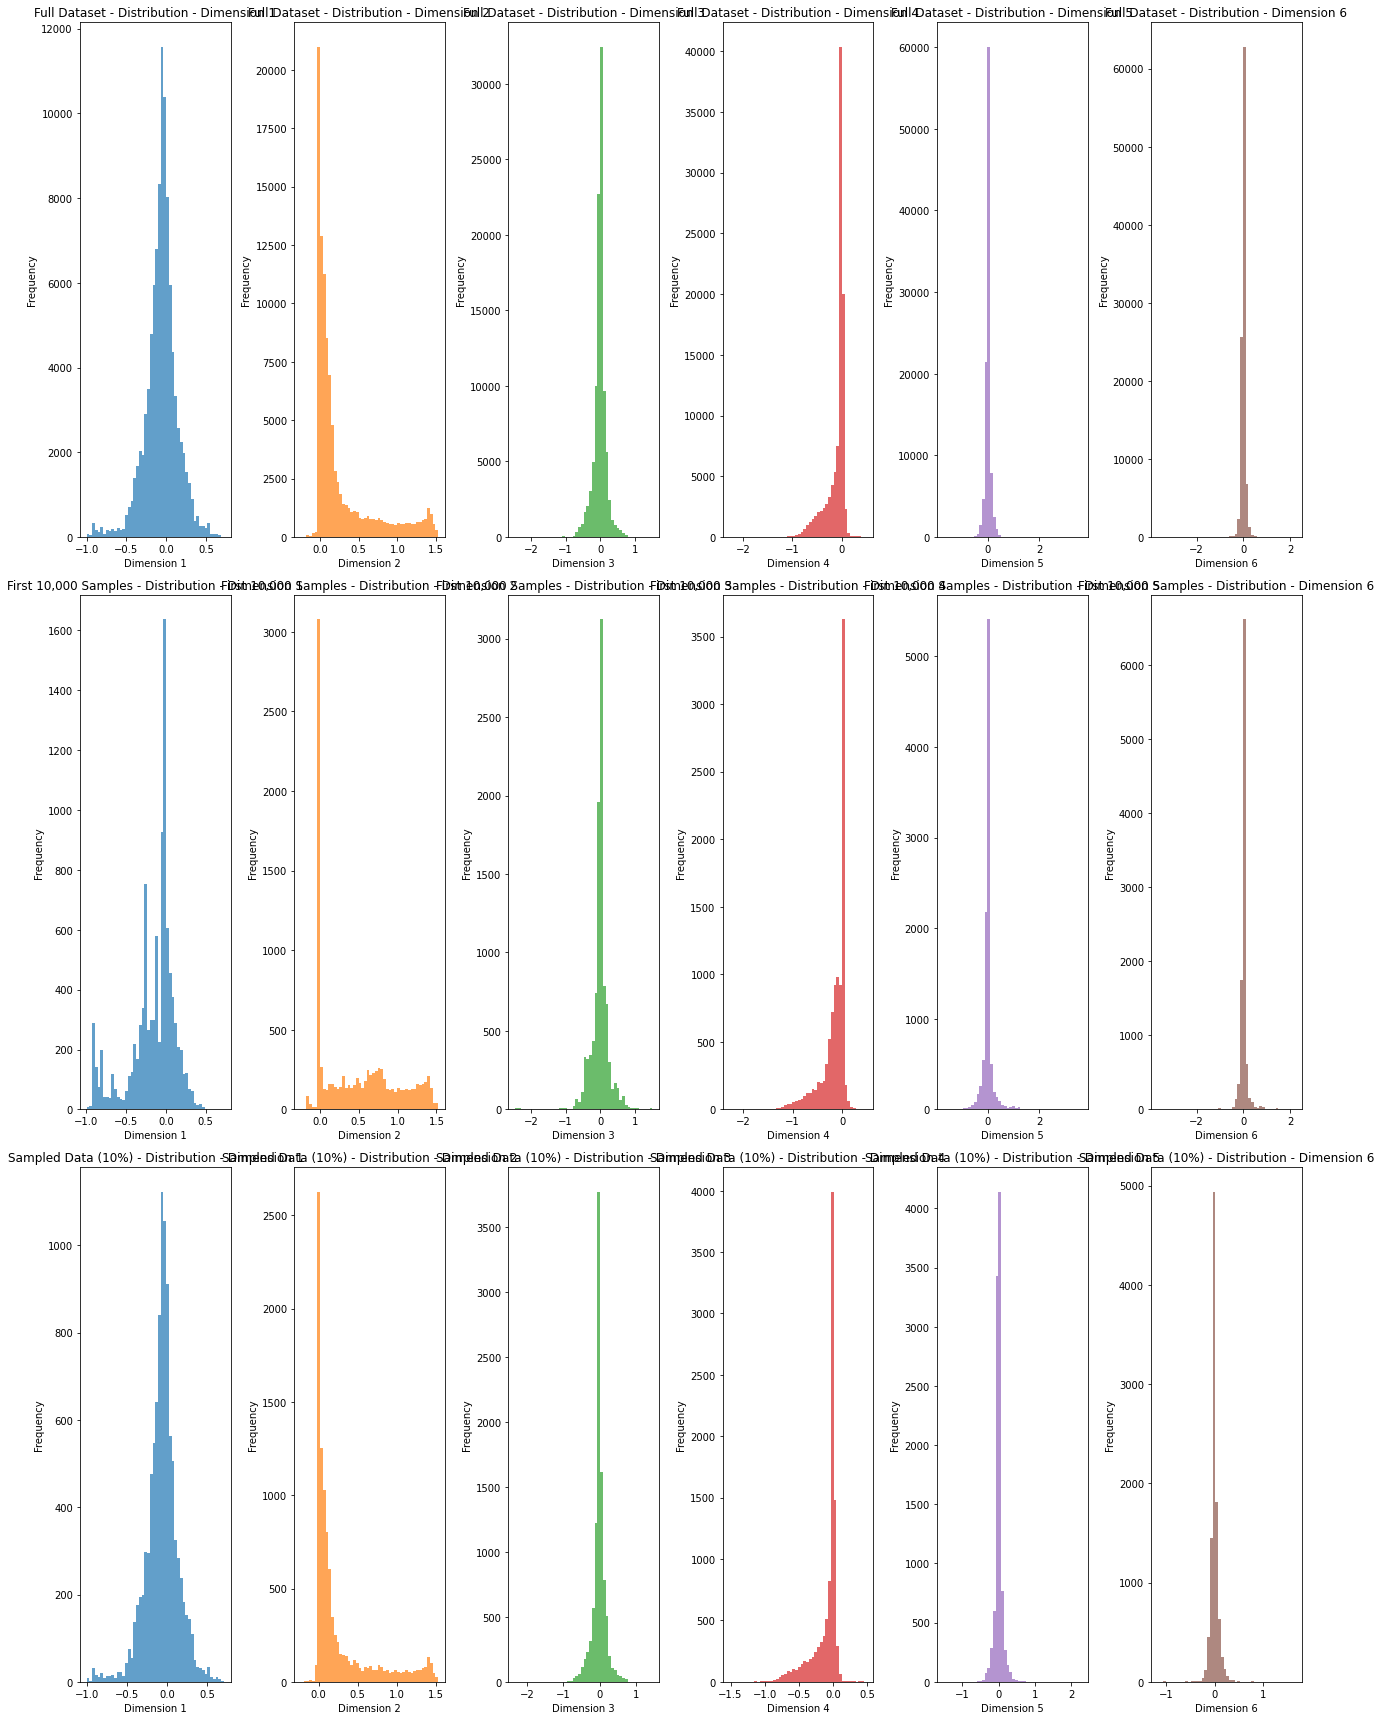

In [3]:
df = pd.read_pickle('OfflineRL-OOD-Teacher-Student/Discrete/CQL-DQN/data/LunarLander-v2_run3_erconv.pkl')
plot_data_distribution(df,0.1)

## Replay Dataset

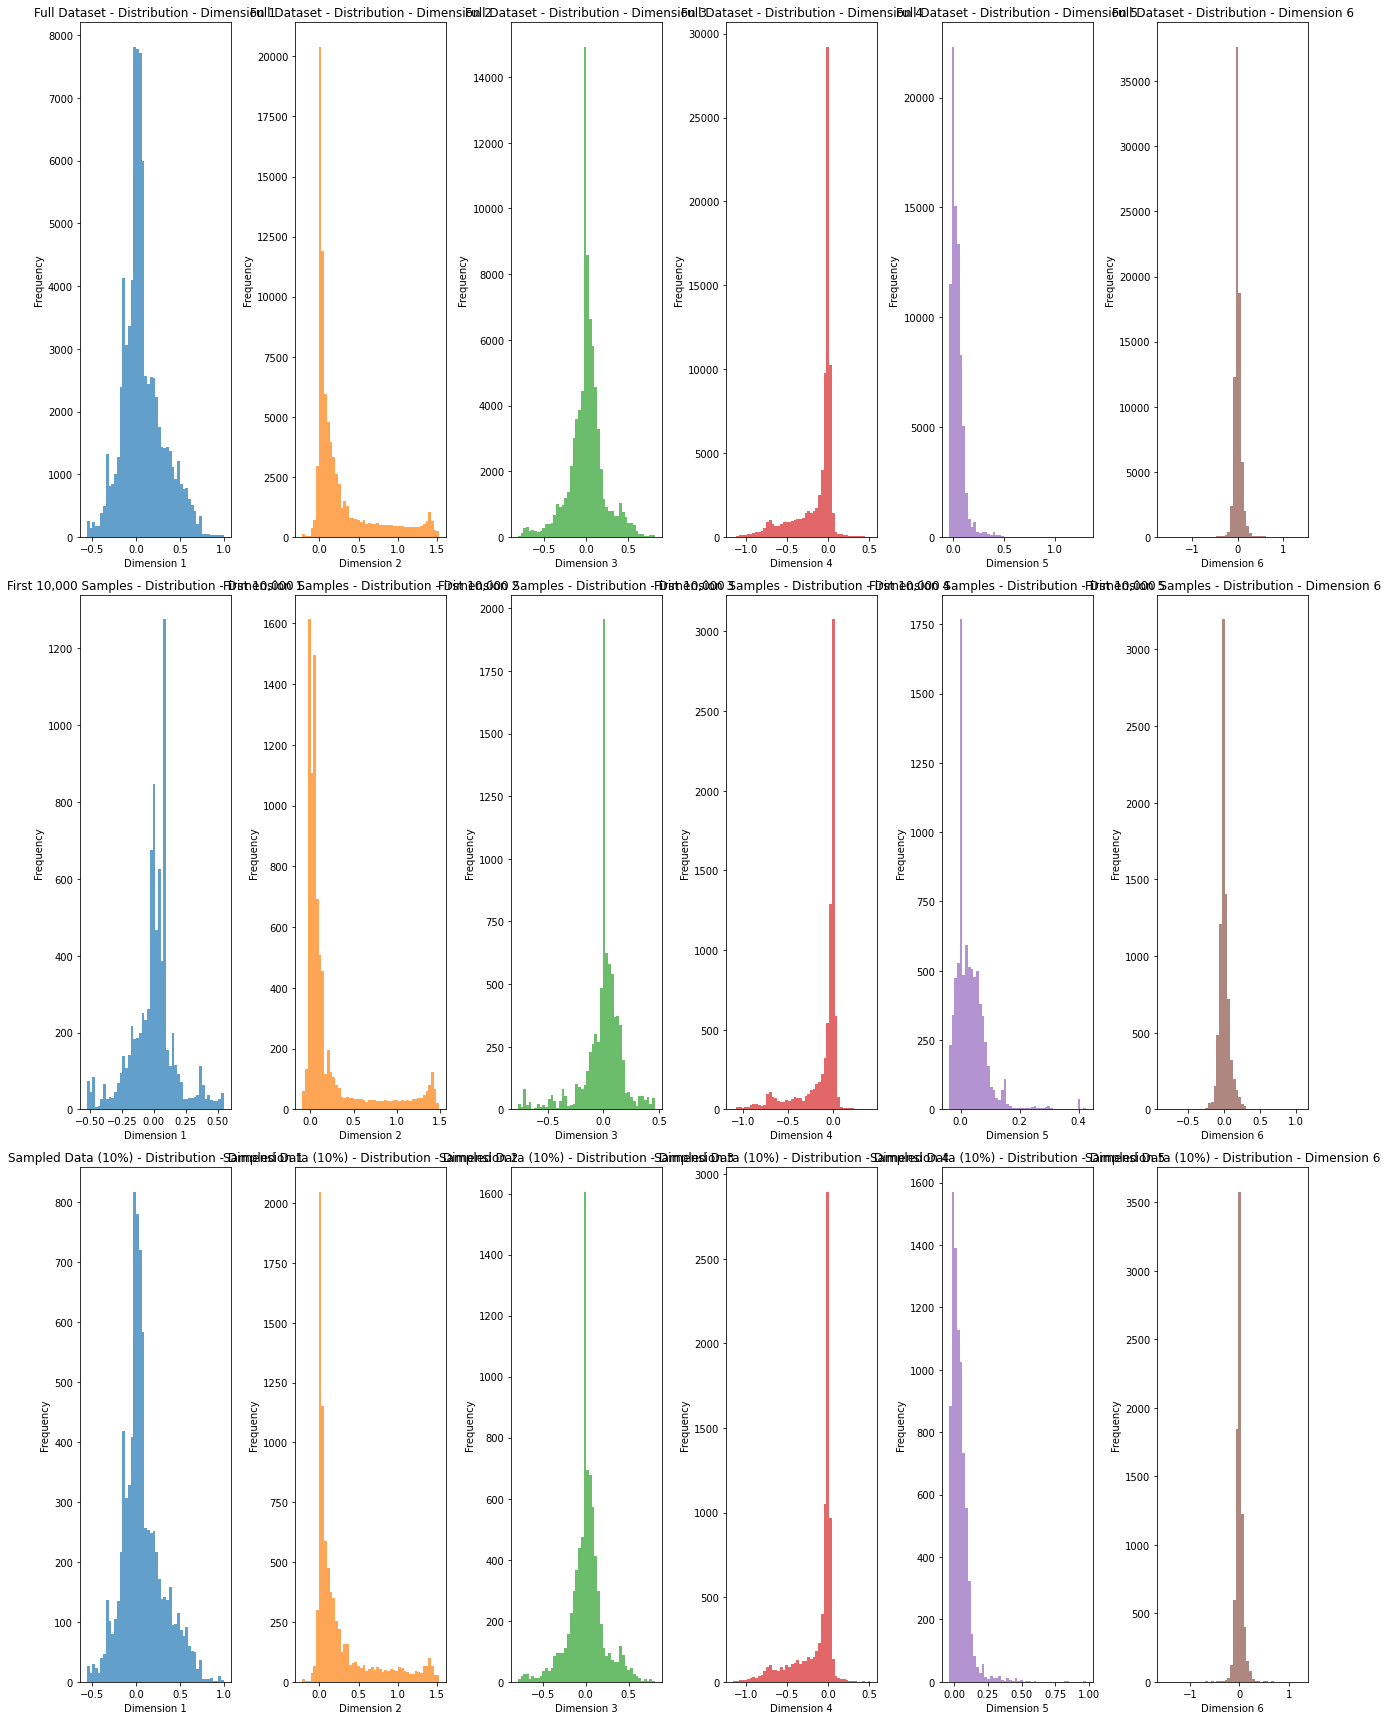

In [4]:
df = pd.read_pickle('OfflineRL-OOD-Teacher-Student/Discrete/CQL-DQN/data/LunarLander-v2_run3_fullyconv.pkl')
filtered_df = df[df['state'].apply(lambda x: x[4]>-0.04)]
plot_data_distribution(filtered_df,0.1)

## Lunar Lander Noisy Dataset

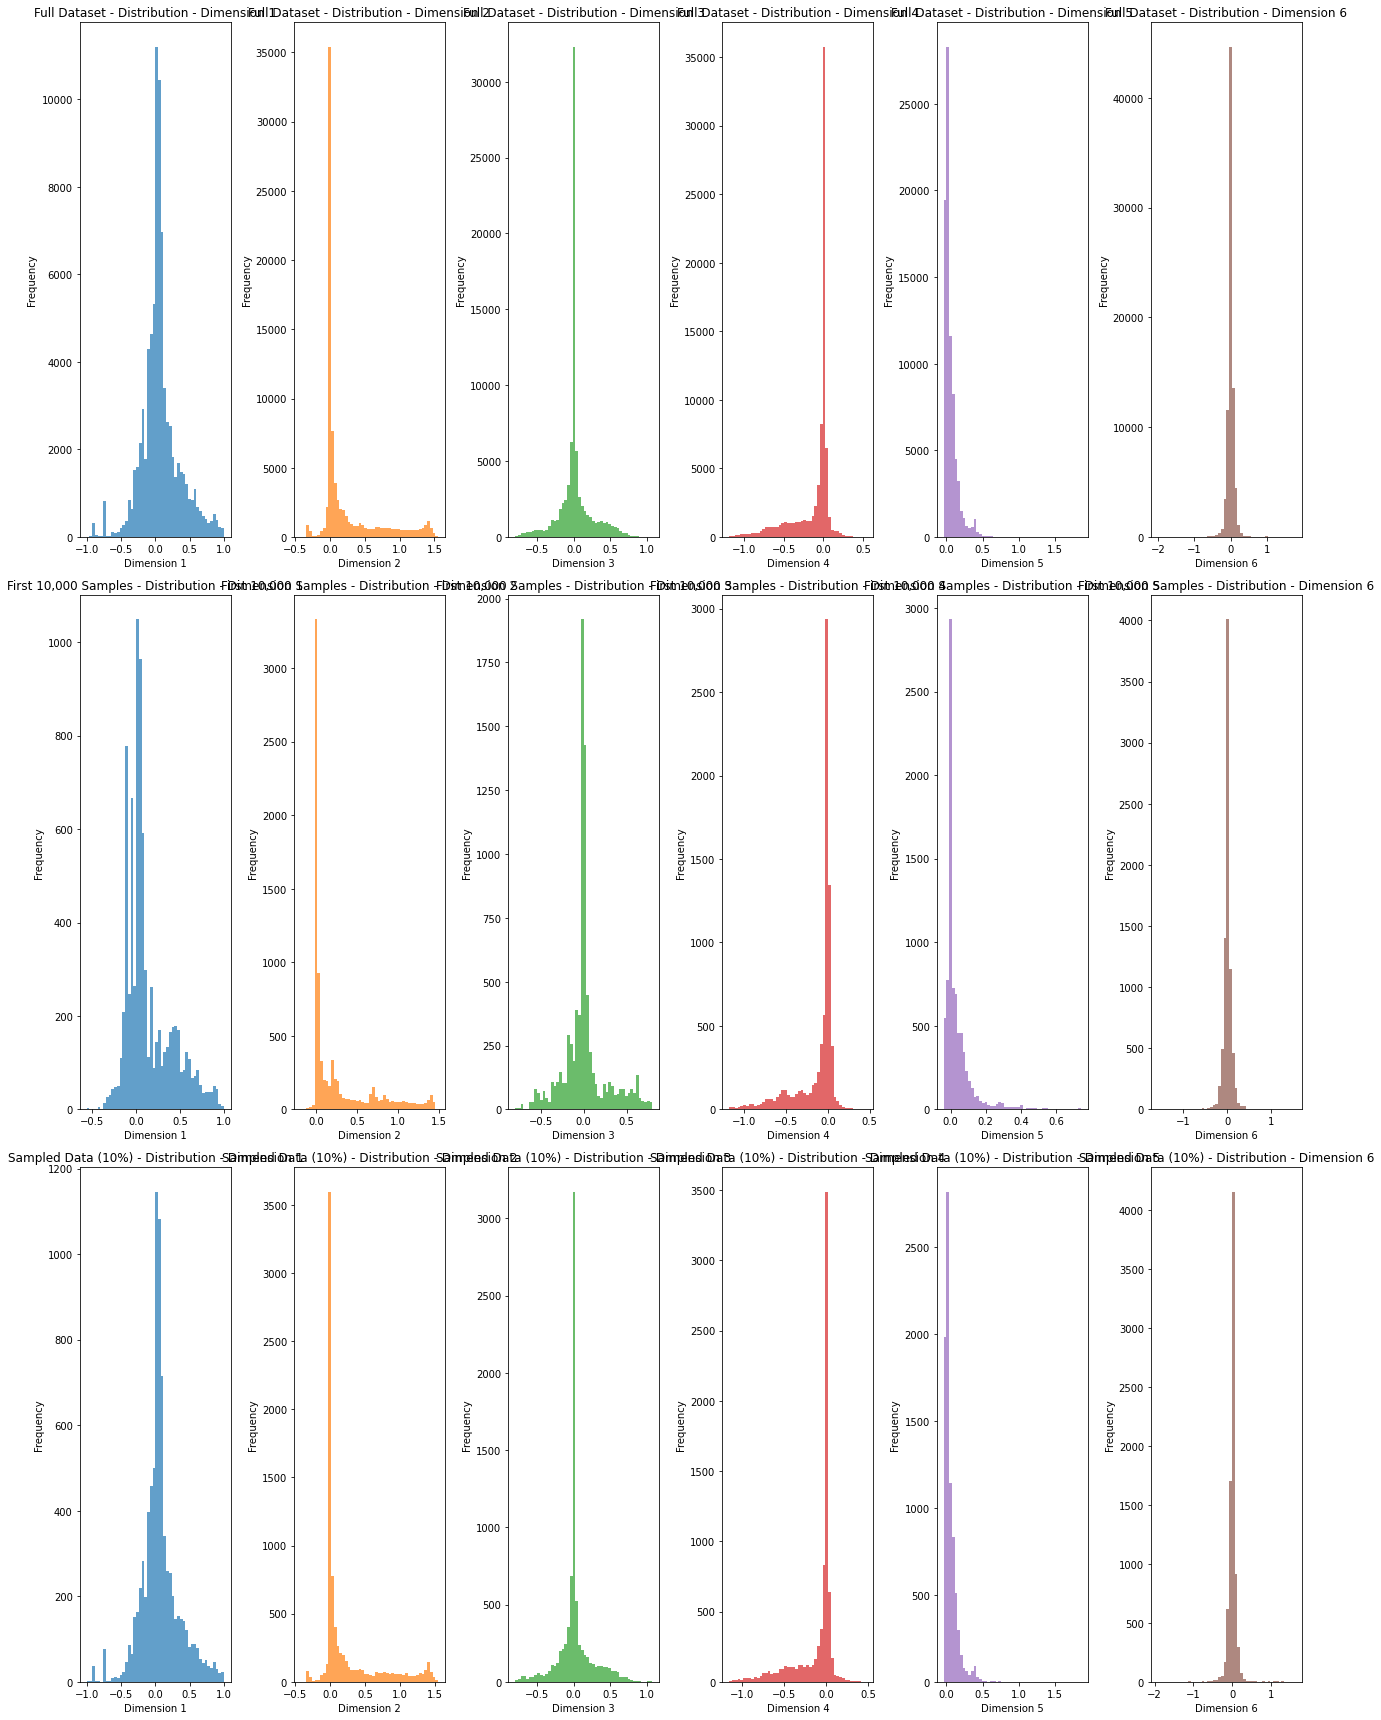

In [5]:
df = pd.read_pickle('OfflineRL-OOD-Teacher-Student/Discrete/CQL-DQN/data/LunarLander-v2_run3_noisyconv.pkl')
filtered_df = df[df['state'].apply(lambda x: x[4]>-0.04)]
plot_data_distribution(filtered_df,0.1)

## State Action Coverage Mountain Car

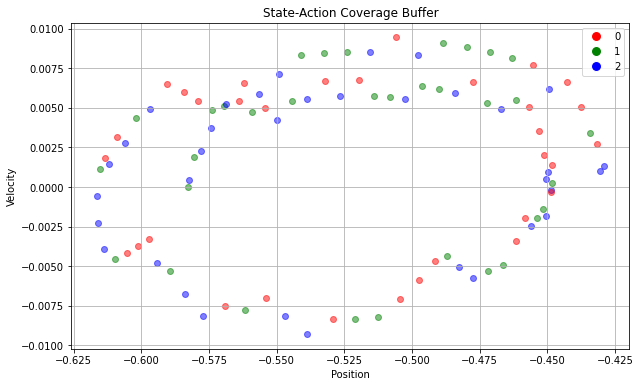

In [75]:
# Sample data (replace this with your actual data)
num_trajectories = 100
positions = position
velocities = velocity
actions = action

# Define colors for each action
action_colors = {0: 'red', 1: 'green', 2: 'blue'}

# Create a scatter plot for state-action coverage
plt.figure(figsize=(10, 6))

for i in range(num_trajectories):
    color = action_colors[actions[i]]
    plt.scatter(positions[i], velocities[i], color=color, alpha=0.5)

# Set plot labels and title
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('State-Action Coverage Buffer')

# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in action_colors.values()]
plt.legend(legend_labels, action_colors.keys(), loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

In [19]:
def check_con(observation):
    position = observation[0]
    velocity = observation[1]
    if position < -0.5:
        if velocity < -0.01:
            return True
        else:
            return True
    else:
        if velocity > 0.01:
            return True
    return False

In [21]:
def act_car(observation):
    position = observation[0]
    velocity = observation[1]
    if position < -0.5:
        if velocity < -0.01:
            action = 0
        else:
            action = 2
    else:
        if velocity > 0.01:
            action = 2
    return action

In [22]:
position = []
velocity = []
action = []
df_new = filtered_df.head(10000)
for ind in df_new.index:
    if check_con(df_new['state'][ind]): 
        position.append(df_new['state'][ind][0])
        velocity.append(df_new['state'][ind][1])
        action.append(act_car(df_new['state'][ind]))
print(len(action))

7725


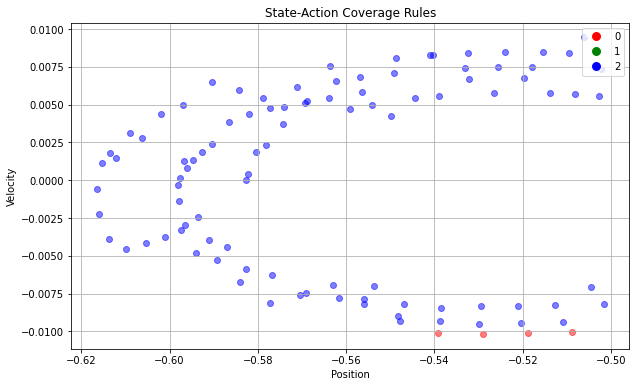

In [79]:
# Sample data (replace this with your actual data)
num_trajectories = 100
positions = position
velocities = velocity
actions = action

# Define colors for each action
action_colors = {0: 'red', 1: 'green', 2: 'blue'}

# Create a scatter plot for state-action coverage
plt.figure(figsize=(10, 6))

for i in range(num_trajectories):
    color = action_colors[actions[i]]
    plt.scatter(positions[i], velocities[i], color=color, alpha=0.5)

# Set plot labels and title
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('State-Action Coverage Rules')

# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in action_colors.values()]
plt.legend(legend_labels, action_colors.keys(), loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

## Cartpole Car

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_pickle('OfflineRL-OOD-Teacher-Student/Discrete/CQL-DQN/data/cartpoledata.pkl')
df_new = df.head(5000)
#df_new = df.iloc[:, [0,1]]
#print(df_new.head)
position = []
velocity = []
action = []
for ind in df_new.index:
    position.append(df_new['state'][ind][0])
    velocity.append(df_new['state'][ind][1])
    action.append(df_new['action'][ind])
print(len(action))

5000


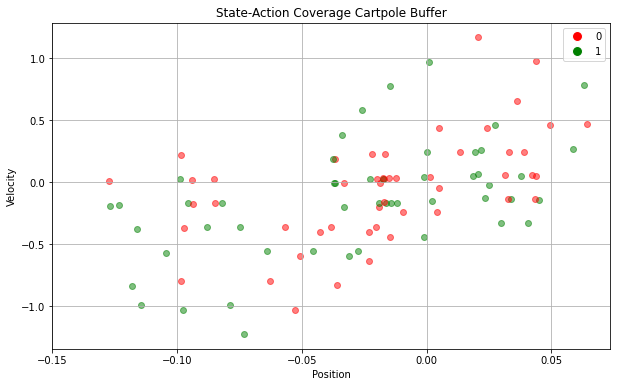

In [68]:
# Sample data (replace this with your actual data)
num_trajectories = 100
positions = position
velocities = velocity
actions = action

# Define colors for each action
action_colors = {0: 'red', 1: 'green'}

# Create a scatter plot for state-action coverage
plt.figure(figsize=(10, 6))

for i in range(num_trajectories):
    color = action_colors[actions[i]]
    plt.scatter(positions[i], velocities[i], color=color, alpha=0.5)
    
# Set x and y-axis limits
#plt.xlim(-0.15, 0.07, 0.01)  # Set x-axis limits
#plt.ylim(-1.3, 0.1)  # Set y-axis limits

plt.xticks(np.arange(-0.15, 0.07, 0.05))

# Set plot labels and title
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('State-Action Coverage Cartpole Buffer')

# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in action_colors.values()]
plt.legend(legend_labels, action_colors.keys(), loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

In [69]:
def check_con(observation):
    if(observation[3]>0.44):
        return True
    else:
        return False

In [70]:
position = []
velocity = []
action = []
for ind in df_new.index:
    if check_con(df_new['state'][ind]): 
        position.append(df_new['state'][ind][0])
        velocity.append(df_new['state'][ind][1])
        action.append(get_action_cartpole_heur2(df_new['state'][ind]))
print(len(action))

1446


In [71]:
def get_action_cartpole_heur2(obs):
    if obs[3]>0.44:
        if obs[3]>-0.3:
            if obs[2]>-0.41:
                action = 1
            else:
                action = 0
        else:
            if obs[2]>0.0:
                action = 0
            else:
                action = 1
    return action

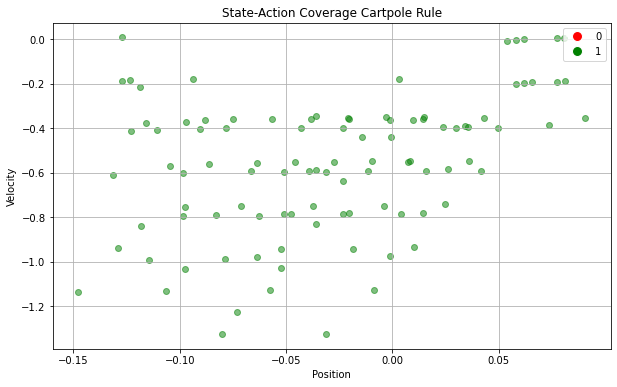

In [72]:
# Sample data (replace this with your actual data)
num_trajectories = 100
positions_c = position
velocities_c = velocity
actions_c = action

# Define colors for each action
action_colors = {0: 'red', 1: 'green'}

# Create a scatter plot for state-action coverage
plt.figure(figsize=(10, 6))

for i in range(num_trajectories):
    color = action_colors[actions_c[i]]
    plt.scatter(positions_c[i], velocities_c[i], color=color, alpha=0.5)
    
plt.xticks(np.arange(-0.15, 0.07, 0.05))

# Set plot labels and title
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('State-Action Coverage Cartpole Rule')

# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in action_colors.values()]
plt.legend(legend_labels, action_colors.keys(), loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

In [53]:
from collections import Counter

def contains(l1, l2):
    return not (Counter(l2) - Counter(l1))

In [56]:
contains(positions, positions_c)

True

## Lunar Lander Coverage

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_pickle('OfflineRL-OOD-Teacher-Student/Discrete/CQL-DQN/data/LunarLander-v2_run3_fullyconv.pkl')
df = df[df['state'].apply(lambda x: x[4]>-0.04)]
df_new = df.head(10000)
#df_new = df.iloc[:, [0,1]]
#print(df_new.head)
positionx = []
positiony = []
action = []
for ind in df_new.index:
    positionx.append(df_new['state'][ind][0])
    positiony.append(df_new['state'][ind][1])
    action.append(df_new['action'][ind])
print(len(action))

10000


In [6]:
def check_con(obs):
    if obs[5]<0.04:
        if obs[3]> -0.35:
            return True
        else:
            if obs[5]>-0.22:
                return True
            else:
                if obs[4]>-0.04:
                    return True
    return False

In [7]:
def get_action_heur_lunar(obs):
    if obs[5]<0.04:
        if obs[3]> -0.35:
            action = 0
        else:
            if obs[5]>-0.22:
                action = 1
            else:
                if obs[4]>-0.04:
                    action = 2
    
    return action

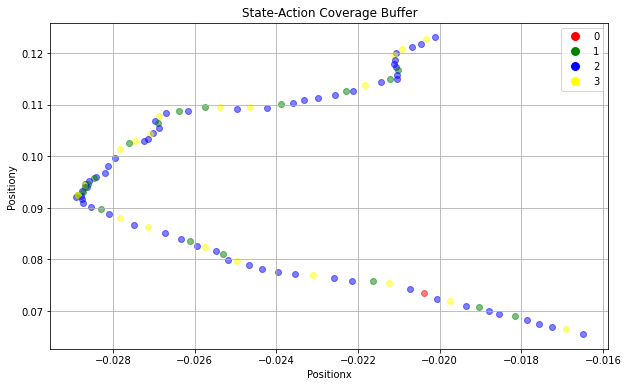

In [86]:
# Sample data (replace this with your actual data)
num_trajectories = 100
positionxs = positionx
positionys = positiony
actions = action

# Define colors for each action
action_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}

# Create a scatter plot for state-action coverage
plt.figure(figsize=(10, 6))

for i in range(num_trajectories):
    color = action_colors[actions[i]]
    plt.scatter(positionxs[i], positionys[i], color=color, alpha=0.5)

# Set plot labels and title
plt.xlabel('Positionx')
plt.ylabel('Positiony')
plt.title('State-Action Coverage Buffer')

# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in action_colors.values()]
plt.legend(legend_labels, action_colors.keys(), loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

In [12]:
positionx = []
positiony = []
action = []
for ind in df_new.index:
    if check_con(df_new['state'][ind]): 
        positionx.append(df_new['state'][ind][0])
        positiony.append(df_new['state'][ind][1])
        action.append(get_action_heur_lunar(df_new['state'][ind]))
print(len(action))

8036
